## Definition of Derivatives
Imagine, we evaluate a given function $f(x)$ at a given input $x_0$. This gives an output $f(x_0)$ which is the $y$-coordinate of the point on the function graph whose $x$-coordinate is $x_0$, so let's call it $y_0$. Now, we also evaluate our function at a second input $x_1 = x_0+h$ which gives a second output $y_1 = f(x_0+h)$. We can compute the ratio of the two differences $\frac{\Delta y}{\Delta x}$ where $\Delta y = (y_1-y_0)$ and $\Delta x = (x_1-x_0) = h$ which gives us the slope of the secant that goes through the two points $(x_0,y_0)$ and $(x_1,y_1)$. When the distance $h$ between our inputs becomes smaller and smaller, the slope of the secant approaches the slope of the tangent to the graph at the point $x_0$. So, we consider the limit of this ratio as $h$ approaches zero:
$$f'(x_0) = \lim_{h \rightarrow 0} \frac{f(x_0+h) - f(x_0)}{h}$$
and call that value the derivative of the function $f$ at the value $x_0$, provided that this limit exists and is finite - otherwise, the derivative is undefined at $x_0$. Note that the point, at which we evaluate this derivative, can be chosen arbitrarily - so we have in fact defined a new function (of $x_0$) which we may just call the derivative of $f$ (without the qualification "at $x_0$"). We may also replace the $x_0$ with $x$ itself as these letters are just exchangable dummy variables - and how we choose to name them has nothing to do with the nature of the function $f$. It is customary to denote that new function with a prime as has been done above. As an example, consider the example function $f(x) = (1+x^3) / (1+x^6)$.

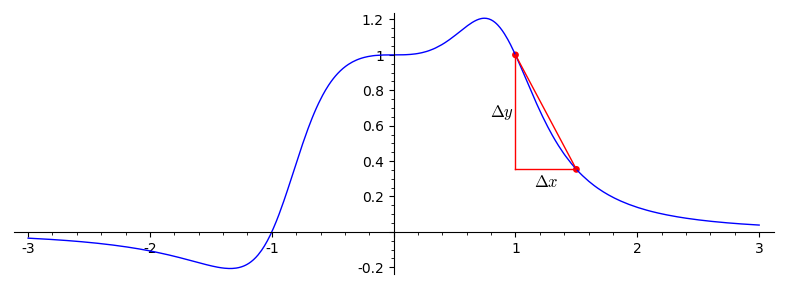

In [9]:
f(x) = (1+x^3) / (1+x^6)
p = plot(f(x), -3, 3)
x0, x1 = 1.0, 1.5
y0, y1 = f(x0), f(x1)
p += points([(x0,y0),(x1,y1)], pointsize=24, color="red")
p += line([(x0,y0),(x1,y1)], color="red") # maybe make it longer
p += line([(x0,y1),(x1,y1)], color="red") # dx, horizontal
p += line([(x0,y0),(x0,y1)], color="red") # dy, vertical 
p += text("$\Delta x$", ((x0+x1)/2, y1-0.07), color='black', fontsize=12)
p += text("$\Delta y$", (x0-0.11, (y0+y1)/2),  color='black', fontsize=12)
#p += text("$\\frac{\Delta x}{\Delta y}$", ((x0+x1)/2+0.15, (y0+y1)/2), color='black', fontsize=12)
p.show(figsize=(8,3))
# todo: make an interactive plot that lets the user adjust x_0 and h via sliders, 
# maybe also select the function from a set of examples

## Computation of Derivatives

### Derivatives of Basic Functions
So how would we go about finding a formula for the derivative $f'(x)$ of a given function $f(x)$? As a matter of fact, the process of taking the derivative of any elementary function (however complex it may be - "elementary function" does not mean simple in this context: https://en.wikipedia.org/wiki/Elementary_function) has been fully figured out and can be and has been mechanized - so in practice, we may just use the sage command "derivative" or its shortcut "diff". However, it is instructive to compute a very simple example by hand to see how the process works. We'll choose $f(x) = x^2$ as our simple example function. Putting this concrete $f(x)$ into the general definition above, we obtain:
$$
f'(x_0) = \lim_{h \rightarrow 0} \frac{(x_0+h)^2 - x_0^2}{h}
        = \lim_{h \rightarrow 0} \frac{x_0^2 + 2 x_0 h + h^2 - x_0^2}{h}
        = \lim_{h \rightarrow 0} \frac{2 x_0 h + h^2}{h}
        = \lim_{h \rightarrow 0} 2 x_0  + h
        = 2 x_0
$$
we note that $x_0$ is actually just the name of the input variable - it has nothing to do with the nature of the functions $f$ or $f'$ for that matter - so we may feel free to rename $x_0$ to $x$ and may say that $(x^2)' = 2x$. In general, we will find that $(x^n)'=nx^{n-1}$. You should also know that $(e^x)' = e^x$, $(\sin x)' = \cos(x)$, $(\cos x)' = -\sin(x)$, $(\ln x)' = 1/x$ and if you like, you may look up a few more derivatives of basic functions here: https://en.wikipedia.org/wiki/Derivative#Rules_for_basic_functions but nowadays, i wouldn't worry very much about memorizing too many of them.

### Derivatives of Combined Functions
OK, so we now have a little catalog with derivatives of a couple of basic functions. How would we compute the derivative, if the function is more complicated, say, like $f(x) = x^2 + e^x \sin(x^2) / (1 + x^2)$? Well, we have only a handful of operations by which we can (recursively) build more complicated functions from simpler ones: addition, subtraction, multiplication, division and composition (which means nesting or chaining - for example $\sin(x^2)$ is a composition of $x^2$ with the sine function). For each of these operations, we have a rule for how the derivative for the combined function can be built from the derivatives of the component functions. These rules go by the names sum/difference rule, product rule, quotient rule and chain rule and read: $(f \pm g)' = f' \pm g'$, $(f g)' = f' g + g' f$, $(f/g)' = (f'g - g'f)/g^2$, $(f(g))' = g' f'(g)$ respectively. That's all that is needed to automate the process of taking derivatives, which can become tedious and error prone indeed if done by hand - so let's have a look at how we would do that in sage:

In [7]:
f(x) = (1+x^3) / (1+x^6)   # our example function from above
f1   = diff( f(x), x)      # diff takes the derivative of f with respect to x
f2   = diff(f1(x), x)      # take the derivative of the previous result
f3   = diff(f(x),  x, 3)   # a 3rd derivative taken directly
f1, f2, f3

(-6*(x^3 + 1)*x^5/(x^6 + 1)^2 + 3*x^2/(x^6 + 1),
 72*(x^3 + 1)*x^10/(x^6 + 1)^3 - 36*x^7/(x^6 + 1)^2 - 30*(x^3 + 1)*x^4/(x^6 + 1)^2 + 6*x/(x^6 + 1),
 -1296*(x^3 + 1)*x^15/(x^6 + 1)^4 + 648*x^12/(x^6 + 1)^3 + 1080*(x^3 + 1)*x^9/(x^6 + 1)^3 - 378*x^6/(x^6 + 1)^2 - 120*(x^3 + 1)*x^3/(x^6 + 1)^2 + 6/(x^6 + 1))

You will notice that in the code above, we have first taken the derivative of our example function - which gives another function - and then took the derivative of *that* other function. The result of that is called a second derivative of $f$ and often denoted by $f''$. And similarly, $f'''$ - the third derivative - is the derivative of the second derivative, and so on. For derivatives of order $n$ higher than 3, one usually writes $f^{(n)}$. You will also notice that when iterating derivatives, the resulting expressions tend to become rather unwieldy really quick - that's what i meant by "tedious and error prone" above. OK, now let's plot our function f together with its first 3 derivatives that we have just computed - but we use some scale factors, such that all functions have a comparable range, otherwise the plot would look ugly and we wouldn't see much:

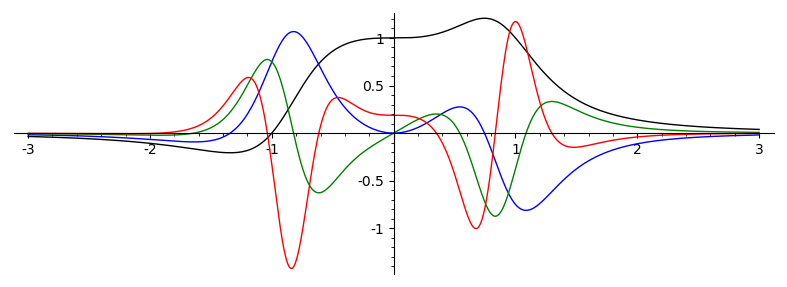

In [8]:
xmin = -3
xmax =  3
p  = plot(f(x),     xmin, xmax, color="black")
p += plot(f1(x)/2,  xmin, xmax, color="blue")
p += plot(f2(x)/8,  xmin, xmax, color="green")
p += plot(f3(x)/32, xmin, xmax, color="red")
p.show(figsize=(8,3))

The higher derivatives become progressively more complicated and "busy". When we will later talk about integrals as the inverse operation to differentiation, we'll see how integration can be viewed as a smoothing operation - and converserly, differentiating - if it is to be the inverse of integration - should be a roughening

In [5]:
# notations f'', f''', f^(n), df/dx, dy/dx, \dot{x}
# existence of higher order derivatives/smoothness - maybe use abs as example function or a piecewise
# polynomial
# todo: partial derivatives (and total derivative), implicit differentiation, higher order derivatives